Realizar el ajuste o ajustes de los modelos

Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

In [61]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y matriz de confusión y métricas
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# MODELO 50-50:

In [62]:
df_travel_balanceado = pd.read_csv("../data/regresion_logistica/df_travel_balanceado.csv", index_col= 0)
df_travel_balanceado.head()

,Unnamed: 0,Duration,Net Sales,Age,products,agency,country,Commision_oe,Agency Type_oe,Distribution Channel_Offline,Distribution Channel_Online,Claim
0,55762,0.675373,-1.031016,-0.873881,0,0,0,0,0,0.0,1.0,0
1,36023,0.193058,1.538160,-0.371102,0,1,0,1,0,0.0,1.0,0
2,46818,-0.467893,0.083709,-0.270547,0,0,0,0,0,0.0,1.0,0
3,40528,1.514959,1.251516,-0.270547,0,0,0,0,0,0.0,1.0,0
4,6650,-0.307121,-0.277250,-0.572214,1,2,0,1,1,0.0,1.0,0


In [63]:
df_travel_balanceado.drop('Unnamed: 0', axis = 1, inplace = True)

In [64]:
df_travel_balanceado.head()


,Duration,Net Sales,Age,products,agency,country,Commision_oe,Agency Type_oe,Distribution Channel_Offline,Distribution Channel_Online,Claim
0,0.675373,-1.031016,-0.873881,0,0,0,0,0,0.0,1.0,0
1,0.193058,1.538160,-0.371102,0,1,0,1,0,0.0,1.0,0
2,-0.467893,0.083709,-0.270547,0,0,0,0,0,0.0,1.0,0
3,1.514959,1.251516,-0.270547,0,0,0,0,0,0.0,1.0,0
4,-0.307121,-0.277250,-0.572214,1,2,0,1,1,0.0,1.0,0


In [65]:
# creamos un df (x) con las variables predictivas y un dataframe (y) que tiene sólo la variable respuesta:

X = df_travel_balanceado.drop("Claim", axis = 1)
y = df_travel_balanceado["Claim"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [66]:
# definimos la regresión logistica

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(X_train,y_train)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(X_train)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(X_test)

In [67]:
train_df_esta = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train_esta, 'Set': ['Train']*len(y_train)})
test_df_esta  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test_esta,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df_esta,test_df_esta], axis = 0)
display(resultados.head())
display(resultados.tail())

,Real,Predicted,Set
71532,1,0,Train
57035,1,1,Train
64990,1,1,Train
65572,1,1,Train
46194,1,0,Train


,Real,Predicted,Set
65134,1,0,Test
75646,1,0,Test
9986,0,0,Test
69117,1,1,Test
27517,0,0,Test


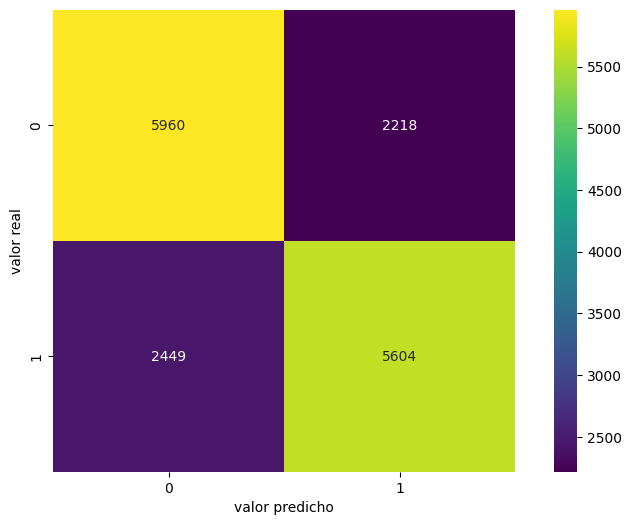

In [68]:
# sacamos la matriz de confusión:

matriz_confusion = confusion_matrix(y_test, y_pred_test_esta)

plt.figure(figsize = (10, 6))
sns.heatmap(matriz_confusion, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

CONCLUSIONES:

0 = no reclaman

1 = sí reclaman

Verdaderos Negativos (el modelo predice que no reclaman y efectivamente no reclaman): 6052

Verdaderos Positivos (el modelo predice que reclaman y efectivamente reclaman): 5666

Falsos Positivos (el modelo predice que reclaman pero no lo hacen): 2165

Falsos Negativos (el modelo predice que no reclaman pero sí lo hacen): 2343

In [69]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):

    """con esta función calculamos las métricas del modelo

    Args:
        clases_reales_test (serie): valores reales para realizar el test
        clases_predichas_test (array): valores predichos del test
        clases_reales_train (serie): valores reales para entrenar el modelo
        clases_predichas_train (array): valores predichos del entreno
        modelo (string): nombre del modelo que le queramos indicar

    Returns:
        df (dataframe): dataframe con los resultados
    """
    
    # test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kappa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [70]:
reglogistic = metricas(y_test, y_pred_test_esta, y_train, y_pred_train_esta, "Regresión logistica")
reglogistic

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.712464,0.716441,0.695890,0.706016,0.424767,test,Regresión logistica
1,0.711597,0.721395,0.691274,0.706014,0.423238,train,Regresión logistica


CONCLUSIÓN:

Nuestro kappa no es lo suficientemente bueno como para decir que este modelo es completamente válido.

Como nos interesa el falso positivo (pedecir que reclaman pero luego que no sea así), nos deberíamos fijar en la métrica recall que desde esa perspectiva, la métrica no es mala.

# MODELO 60-40:

In [71]:
df_travel_balanceado_b = pd.read_csv("../data/regresion_logistica/df_travel_balanceado_b.csv", index_col= 0)
df_travel_balanceado_b.sample()

,Unnamed: 0,Duration,Net Sales,Age,products,agency,country,Commision_oe,Agency Type_oe,Distribution Channel_Offline,Distribution Channel_Online,Claim
32494,41781,0.032286,0.337585,-0.270547,0,0,0,0,0,0.0,1.0,0


In [72]:
df_travel_balanceado_b.drop('Unnamed: 0', axis = 1, inplace = True)

In [73]:
A = df_travel_balanceado_b.drop("Claim", axis = 1)
b = df_travel_balanceado_b["Claim"]

A_train, A_test, b_train, b_test = train_test_split(A, b, test_size = 0.2, random_state = 42)

# definimos la regresión logistica

log_reg_b = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_b.fit(A_train,b_train)

# obtenemos las predicciones para el conjunto de entrenamiento
b_pred_train_b = log_reg_b.predict(A_train)

# obtenemos las predicciones para el conjunto de test
b_pred_test_b = log_reg_b.predict(A_test)

In [74]:
train_df_b = pd.DataFrame({'Real': b_train, 'Predicted': b_pred_train_b, 'Set': ['Train']*len(b_train)})
test_df_b  = pd.DataFrame({'Real': b_test,  'Predicted': b_pred_test_b,  'Set': ['Test']*len(b_test)})
resultados_b = pd.concat([train_df_b,test_df_b], axis = 0)
display(resultados_b.head())
display(resultados_b.tail())

,Real,Predicted,Set
604,0,0,Train
6134,0,1,Train
324,0,0,Train
18145,0,0,Train
26493,0,0,Train


,Real,Predicted,Set
7976,0,0,Test
30342,0,0,Test
10838,0,0,Test
2582,0,1,Test
50254,1,1,Test


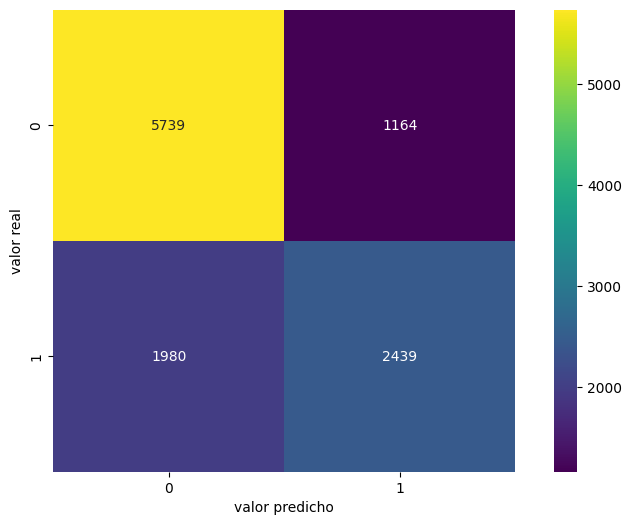

In [75]:
# sacamos la matriz de confusión:

matriz_confusion_b = confusion_matrix(b_test, b_pred_test_b)

plt.figure(figsize = (10, 6))
sns.heatmap(matriz_confusion_b, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

CONCLUSIONES:

0 = no reclaman

1 = sí reclaman

Verdaderos Negativos (el modelo predice que no reclaman y efectivamente no reclaman): 5752

Verdaderos Positivos (el modelo predice que reclaman y efectivamente reclaman): 2441

Falsos Positivos (el modelo predice que reclaman pero no lo hacen): 1146

Falsos Negativos (el modelo predice que no reclaman pero sí lo hacen):1989

In [76]:
reglogistic_b = metricas(b_test, b_pred_test_b, b_train, b_pred_train_b, "Regresión logistica 2")
reglogistic_b

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.722311,0.676936,0.551935,0.608078,0.396485,test,Regresión logistica 2
1,0.723456,0.675493,0.555170,0.609450,0.398543,train,Regresión logistica 2


CONCLUSIÓN:

En este modelo nuestro kappa tampoco es lo suficientemente bueno como para decir que este modelo es completamente válido.

# MODELO 3: test 50

In [77]:
df_travel_test_50 = pd.read_csv("../data/regresion_logistica/df_travel_test_50.csv", index_col=0)
df_travel_test_50.sample()

,Unnamed: 0,Duration,Net Sales,Age,products,agency,country,Commision_oe,Agency Type_oe,Distribution Channel_Offline,Distribution Channel_Online,Claim
16789,16789,0.014422,0.337585,-0.270547,0,0,0,0,0,0.0,1.0,0


In [78]:
df_travel_test_50.drop('Unnamed: 0', axis = 1, inplace = True)

In [79]:
X_test_50=df_travel_test_50.drop('Claim', axis = 1)
y_test_50=df_travel_test_50['Claim']

In [80]:
X_train_50 = df_travel_balanceado.drop("Claim", axis = 1)
y_train_50 = df_travel_balanceado["Claim"]

In [81]:
log_reg_esta_50 = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta_50.fit(X_train_50,y_train_50)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta_50 = log_reg_esta.predict(X_train_50)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta_50 = log_reg_esta.predict(X_test_50)

In [82]:
train_df_esta_50 = pd.DataFrame({'Real': y_train_50, 'Predicted': y_pred_train_esta_50, 'Set': ['Train']*len(y_train_50)})
test_df_esta_50  = pd.DataFrame({'Real': y_test_50,  'Predicted': y_pred_test_esta_50,  'Set': ['Test']*len(y_test_50)})
resultados_50 = pd.concat([train_df_esta_50,test_df_esta_50], axis = 0)
display(resultados_50.head())
display(resultados_50.tail())

,Real,Predicted,Set
0,0,0,Train
1,0,1,Train
2,0,0,Train
3,0,1,Train
4,0,1,Train


,Real,Predicted,Set
33751,0,0,Test
45792,0,0,Test
3977,0,0,Test
21411,0,0,Test
33700,0,0,Test


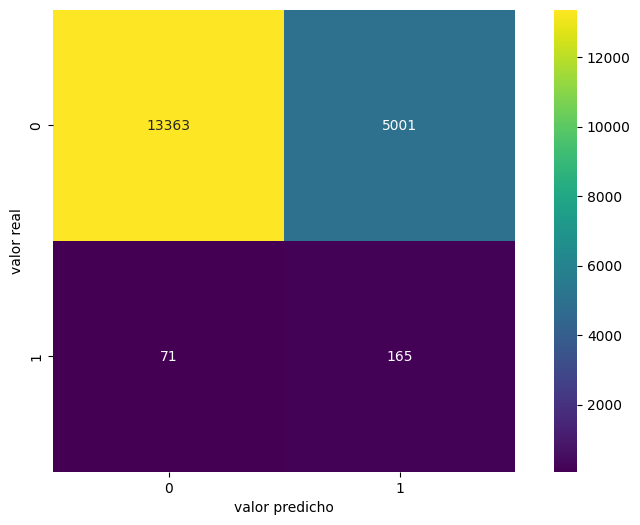

In [83]:
# sacamos la matriz de confusión:

matriz_confusion_50 = confusion_matrix(y_test_50, y_pred_test_esta_50)

plt.figure(figsize = (10, 6))
sns.heatmap(matriz_confusion_50, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

CONCLUSIONES:

0 = no reclaman

1 = sí reclaman

Verdaderos Negativos (el modelo predice que no reclaman y efectivamente no reclaman): 13503

Verdaderos Positivos (el modelo predice que reclaman y efectivamente reclaman): 179

Falsos Positivos (el modelo predice que reclaman pero no lo hacen): 4852

Falsos Negativos (el modelo predice que no reclaman pero sí lo hacen): 66

In [84]:
reglogistic_50 = metricas(y_test_50, y_pred_test_esta_50, y_train_50, y_pred_train_esta_50, "Regresión logistica 3")
reglogistic_50

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.727312,0.031940,0.699153,0.061088,0.037737,test,Regresión logistica 3
1,0.711770,0.720401,0.692190,0.706014,0.423540,train,Regresión logistica 3


CONCLUSION:

Descartamos este modelo

# MODELO 4: test 60

In [85]:
df_travel_test_60 = pd.read_csv("../data/regresion_logistica/df_travel_test_60.csv", index_col=0)
df_travel_test_60.sample()

,Unnamed: 0,Duration,Net Sales,Age,products,agency,country,Commision_oe,Agency Type_oe,Distribution Channel_Offline,Distribution Channel_Online,Claim
61442,61442,0.693236,-1.191855,0.936121,0,0,0,1,1,0.0,1.0,0


In [86]:
df_travel_test_60.drop('Unnamed: 0', axis = 1, inplace = True)

In [87]:
X_test_60=df_travel_test_60.drop('Claim', axis = 1)
y_test_60=df_travel_test_60['Claim']

In [88]:
X_train_60 = df_travel_balanceado_b.drop("Claim", axis = 1)
y_train_60 = df_travel_balanceado_b["Claim"]

In [89]:
log_reg_esta_60 = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta_60.fit(X_train_60,y_train_60)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta_60 = log_reg_esta.predict(X_train_60)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta_60 = log_reg_esta.predict(X_test_60)

In [90]:
train_df_esta_60 = pd.DataFrame({'Real': y_train_60, 'Predicted': y_pred_train_esta_60, 'Set': ['Train']*len(y_train_60)})
test_df_esta_60  = pd.DataFrame({'Real': y_test_60,  'Predicted': y_pred_test_esta_60,  'Set': ['Test']*len(y_test_60)})
resultados_60 = pd.concat([train_df_esta_60,test_df_esta_60], axis = 0)
display(resultados_60.head())
display(resultados_60.tail())

,Real,Predicted,Set
0,1,0,Train
1,0,0,Train
2,0,0,Train
3,0,0,Train
4,0,0,Train


,Real,Predicted,Set
15209,0,1,Test
14310,0,1,Test
24675,0,0,Test
50004,0,0,Test
55854,0,1,Test


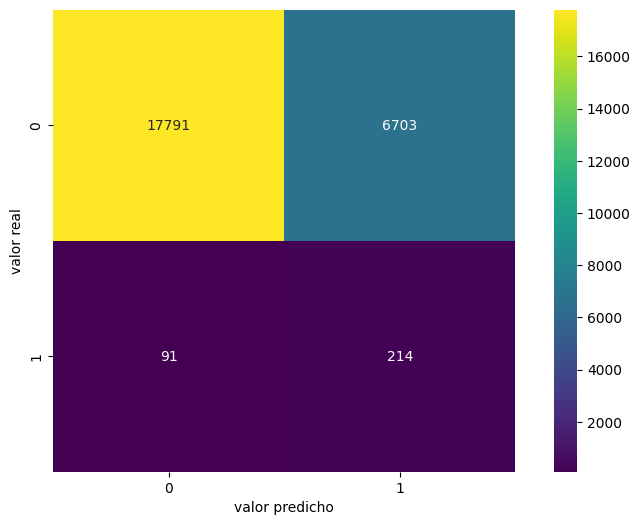

In [91]:
# sacamos la matriz de confusión:

matriz_confusion_60 = confusion_matrix(y_test_60, y_pred_test_esta_60)

plt.figure(figsize = (10, 6))
sns.heatmap(matriz_confusion_60, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

CONCLUSIONES:

0 = no reclaman

1 = sí reclaman

Verdaderos Negativos (el modelo predice que no reclaman y efectivamente no reclaman): 17971

Verdaderos Positivos (el modelo predice que reclaman y efectivamente reclaman): 214

Falsos Positivos (el modelo predice que reclaman pero no lo hacen): 6523

Falsos Negativos (el modelo predice que no reclaman pero sí lo hacen): 91

In [92]:
reglogistic_60 = metricas(y_test_60, y_pred_test_esta_60, y_train_60, y_pred_train_esta_60, "Regresión logistica 4")
reglogistic_60

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.726037,0.030938,0.701639,0.059263,0.036566,test,Regresión logistica 4
1,0.709041,0.615493,0.671511,0.642283,0.397866,train,Regresión logistica 4


CONCLUSION

Descartamos este modelo